**Two Tasks**
Optimal fraction of time that the high price and the low price should be offered based on a policy that...
1) Doesn't depend on how many spots are open
- decides randomly and uses the probability of a person accepting a spot for high and low price
2) Depends on how many spots are open 
- manually decides high or low depending on how many spots are filled, can specify a threshold

**Task 1**

In [4]:
import numpy as np

def optimal_breakdown(days, spots=8, p_stay=0.08, high=1.4, prob_high=0.145, low=1, prob_low=0.6, prob_high_days=0.5):
    revenue = 0
    # Array for occupancy
    occupancy = np.zeros(spots)

    for day in range(days):
        # Decrease as each day passes
        occupancy[occupancy > 0] -= 1

        # High or low price each day
        if np.random.rand() <= prob_high_days:
            price = high
            prob_price = prob_high
        else:
            price = low
            prob_price = prob_low

        # Check if spots are free
        for i in range(spots):
            if occupancy[i] <= 0:  
                if np.random.rand() <= prob_price:
                    # How many days a truck stays
                    stay_duration = np.random.geometric(p_stay)
                    occupancy[i] = stay_duration 
                    revenue += price*stay_duration 
                break

    return revenue

#Simulation
days = 365  
simulations = 100  

test_proportions = np.linspace(0, 1, 11) 
grid_search_results_corrected = {}

for proportion in test_proportions:
    average_revenue = np.mean([optimal_breakdown(days, prob_high_days=proportion) for _ in range(simulations)])
    grid_search_results_corrected[proportion] = average_revenue

for prop, rev in grid_search_results_corrected.items():
    print(f"Proportion of high price days: {prop:.1f}, Average Revenue: ${rev:.2f}")

Proportion of high price days: 0.0, Average Revenue: $2342.67
Proportion of high price days: 0.1, Average Revenue: $2271.88
Proportion of high price days: 0.2, Average Revenue: $2160.92
Proportion of high price days: 0.3, Average Revenue: $2073.54
Proportion of high price days: 0.4, Average Revenue: $1924.43
Proportion of high price days: 0.5, Average Revenue: $1795.58
Proportion of high price days: 0.6, Average Revenue: $1644.40
Proportion of high price days: 0.7, Average Revenue: $1428.71
Proportion of high price days: 0.8, Average Revenue: $1282.06
Proportion of high price days: 0.9, Average Revenue: $1119.51
Proportion of high price days: 1.0, Average Revenue: $935.02


In [52]:
#Simulation
days = 365  
simulations = 1000  
test_proportions = np.linspace(0, 1, 11) 
grid_search_results_corrected = {}

for proportion in test_proportions:
    average_revenue = np.mean([optimal_breakdown(days, spots=8, p_stay=0.08, high=3, prob_high=0.1, low=2.5, prob_low=0.6) for _ in range(simulations)])
    grid_search_results_corrected[proportion] = average_revenue

for prop, rev in grid_search_results_corrected.items():
    print(f"Proportion of high price days: {prop:.1f}, Average Revenue: ${rev:.2f}")

Proportion of high price days: 0.0, Average Revenue: $4015.33
Proportion of high price days: 0.1, Average Revenue: $4019.41
Proportion of high price days: 0.2, Average Revenue: $4020.14
Proportion of high price days: 0.3, Average Revenue: $4005.49
Proportion of high price days: 0.4, Average Revenue: $4031.47
Proportion of high price days: 0.5, Average Revenue: $4022.88
Proportion of high price days: 0.6, Average Revenue: $4032.74
Proportion of high price days: 0.7, Average Revenue: $4026.73
Proportion of high price days: 0.8, Average Revenue: $4031.57
Proportion of high price days: 0.9, Average Revenue: $4035.13
Proportion of high price days: 1.0, Average Revenue: $4038.84


In [53]:
days = 365
simulations = 1000
test_prices = [(2, 1), (2, 1.5), (2, 2), (2.5, 1), (2.5, 1.5), (2.5, 2), (3, 1), (3, 1.5), (3, 2)]
grid_search_results = {}

for high, low in test_prices:
    average_revenue = np.mean([optimal_breakdown(days, high=high, low=low) for _ in range(simulations)])
    grid_search_results[(high, low)] = average_revenue

for prices, rev in grid_search_results.items():
    print(f"High price: {prices[0]}, Low price: {prices[1]}, Average Revenue: ${rev:.2f}")

High price: 2, Low price: 1, Average Revenue: $1973.74
High price: 2, Low price: 1.5, Average Revenue: $2653.44
High price: 2, Low price: 2, Average Revenue: $3305.34
High price: 2.5, Low price: 1, Average Revenue: $2137.92
High price: 2.5, Low price: 1.5, Average Revenue: $2807.65
High price: 2.5, Low price: 2, Average Revenue: $3452.89
High price: 3, Low price: 1, Average Revenue: $2299.13
High price: 3, Low price: 1.5, Average Revenue: $2963.92
High price: 3, Low price: 2, Average Revenue: $3646.87


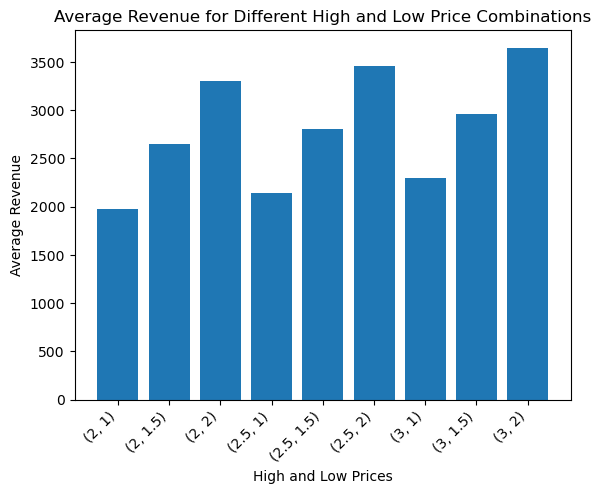

In [54]:
import matplotlib.pyplot as plt

prices = [str(prices) for prices in test_prices]
revenues = list(grid_search_results.values())

plt.bar(prices, revenues)
plt.xlabel('High and Low Prices')
plt.ylabel('Average Revenue')
plt.title('Average Revenue for Different High and Low Price Combinations')
plt.xticks(rotation=45, ha='right')
plt.show()

**Task 2**

In [55]:
# Same function but dynamically changing based on how many spots are available, rather than random

def optimal_breakdown_dynamic(days, spots=8, p_stay=0.08, high=1.4, prob_high=0.145, low=1, prob_low=0.6, prob_high_days=0.5, number_filled=5):
    revenue = 0
    # Array for occupancy
    occupancy = np.zeros(spots)

    for day in range(days):
        # Decrease as each day passes
        occupancy[occupancy > 0] -= 1

        # High or low price each day
        number_filled_spots = np.count_nonzero(occupancy > 0)
            
        #if np.random.rand() <= prob_high_days:
        if number_filled_spots >= number_filled:
            price = high
            prob_price = prob_high
        else:
            price = low
            prob_price = prob_low

        # Check if spots are free
        for i in range(spots):
            if occupancy[i] <= 0:  
                if np.random.rand() <= prob_price:
                    # How many days a truck stays
                    stay_duration = np.random.geometric(p_stay)
                    occupancy[i] = stay_duration 
                    revenue += price*stay_duration 
                    break

    return revenue


In [56]:
# Simulation parameters
days = 365
simulations = 1000
number_filled_values = [1,2,3,4,5,6,7,8]

# Perform simulations for different number_filled values
for number_filled in number_filled_values:
    average_revenue = np.mean([optimal_breakdown_dynamic(days, number_filled=number_filled) for _ in range(simulations)])
    print(f"Number Filled: {number_filled}, Average Revenue: ${average_revenue:.2f}")

Number Filled: 1, Average Revenue: $2587.09
Number Filled: 2, Average Revenue: $2583.99
Number Filled: 3, Average Revenue: $2572.22
Number Filled: 4, Average Revenue: $2552.79
Number Filled: 5, Average Revenue: $2542.65
Number Filled: 6, Average Revenue: $2563.57
Number Filled: 7, Average Revenue: $2627.70
Number Filled: 8, Average Revenue: $2680.19


In [ ]:
days = 365
simulations = 1000
test_prices = [(2, 1), (2, 1.5), (2, 2), (2.5, 1), (2.5, 1.5), (2.5, 2), (3, 1), (3, 1.5), (3, 2)]
grid_search_results = {}

for high, low in test_prices:
    average_revenue = np.mean([optimal_breakdown_dynamic(days, high=high, low=low) for _ in range(simulations)])
    grid_search_results[(high, low)] = average_revenue

for prices, rev in grid_search_results.items():
    print(f"High price: {prices[0]}, Low price: {prices[1]}, Average Revenue: ${rev:.2f}")

In [ ]:
import matplotlib.pyplot as plt

prices = [str(prices) for prices in test_prices]
revenues = list(grid_search_results.values())

plt.bar(prices, revenues)
plt.xlabel('High and Low Prices')
plt.ylabel('Average Revenue')
plt.title('Average Revenue for Different High and Low Price Combinations')
plt.xticks(rotation=45, ha='right')
plt.show()